In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.chdir('/content/gdrive/My Drive/Year 4/Data Mining/Mini Project/')
!pwd

/content/gdrive/My Drive/Year 4/Data Mining/Mini Project


In [ ]:
!ls

'Another Model - Prediction Implementation.ipynb'   final-data
 basket_data.csv				    resources
 bread_basket.csv				    sales_clothes.csv
 data						   'Sequence Mining.ipynb'
'Data Cleaning + EDA - Project prediction.ipynb'   'Sequence Mining - test.ipynb'
 ecommerce_basket_analysis.csv


In [4]:
# Import neccesary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Standardize data for applying Weka

In [ ]:
data = pd.read_csv("final-data/bread_basket.csv")
data = data[['Transaction', 'Item']]
data.head()

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


<ipython-input-13-a7ec239f12be>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_items.index, y=top_10_items.values, palette=custom_palette)


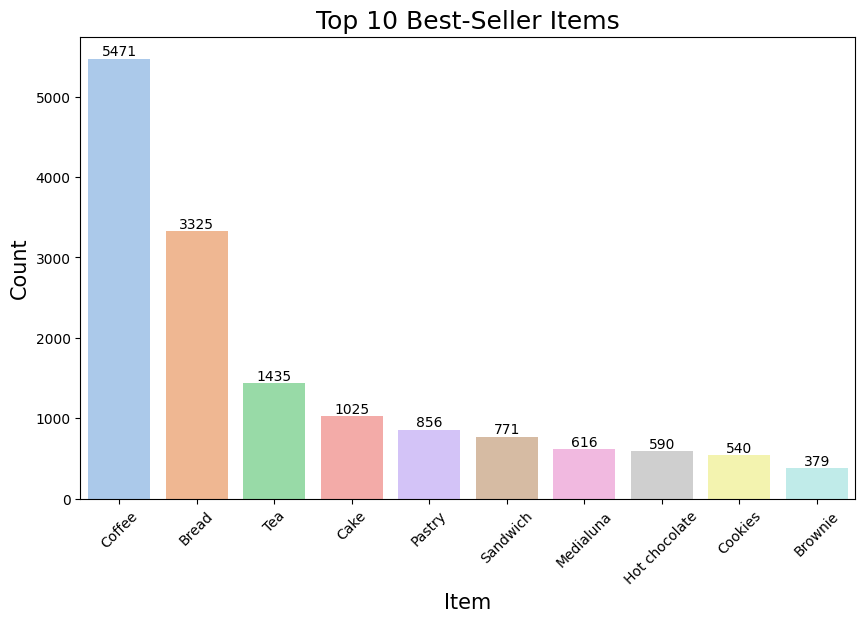

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = sns.color_palette("pastel")

# Get the counts of each item
item_counts = data['Item'].value_counts()

# Select the top 10 items
top_10_items = item_counts.head(10)

# Plot the top 10 items with count values
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_items.index, y=top_10_items.values, palette=custom_palette)

# Add count values as annotations
for i, count in enumerate(top_10_items.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.title('Top 10 Best-Seller Items', fontsize = 18)
plt.xlabel('Item',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.xticks(rotation=45)
plt.show()

In [ ]:
def count_items_per_transaction(df):
    # Group by 'Transaction' and count the number of items in each group
    item_counts = data.groupby('Transaction').size()
    return item_counts

# Use the function
class_data = count_items_per_transaction(data)
class_data = pd.DataFrame({'Transaction': class_data.index, 'Count': class_data.values})

In [ ]:
class_data.head()

,Transaction,Count
0,1,1
1,2,2
2,3,3
3,4,1
4,5,3


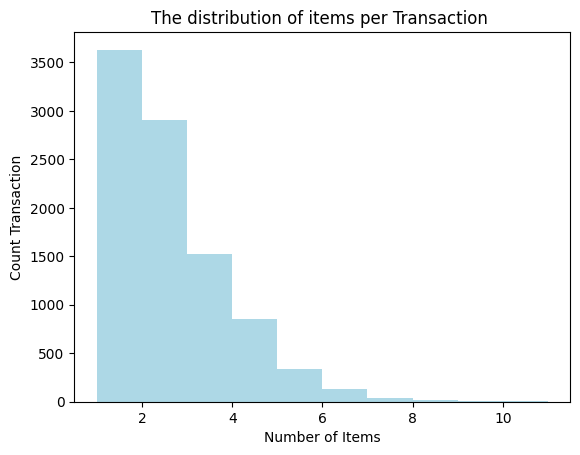

In [ ]:
plt.hist(class_data['Count'], color = 'lightblue')
plt.xlabel('Number of Items')
plt.ylabel('Count Transaction')
plt.title("The distribution of items per Transaction ")
plt.show()

In [ ]:
def invoice_categorize(x):
    if x > 2:
        return 'high'
    else:
        return 'low'

In [ ]:
class_data['Class'] = class_data['Count'].apply(invoice_categorize)

In [ ]:
class_data['Class'].value_counts()

Class
low     6539
high    2926
Name: count, dtype: int64

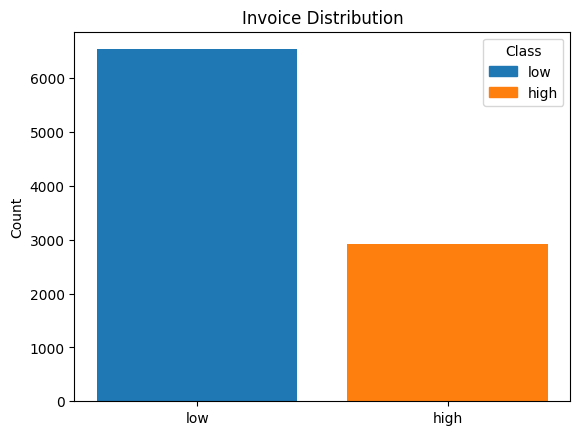

In [ ]:
class_counts = class_data['Class'].value_counts()

# Extract class names and counts
class_names = class_counts.index
counts = class_counts.values

bar_colors = ['tab:blue', 'tab:orange']
fig, ax = plt.subplots()
# Plot the bar chart
ax.bar(class_names, counts, color=bar_colors)

# Create a custom legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in bar_colors]
ax.legend(handles, class_names, title='Class')
ax.set_ylabel('Count')
ax.set_title('Invoice Distribution')
plt.show()

In [ ]:
class_data.drop(columns=['Count'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket = pd.pivot_table(data=data, index='Transaction', columns='Item', aggfunc=len, fill_value=np.nan)
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def standardize_data(x):
    if x > 0:
        return 1
    else:
        return np.nan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket_sets = basket.applymap(standardize_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data = pd.merge(basket_sets, class_data, left_on='Transaction', right_on='Transaction')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,...,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge,Class
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high


In [ ]:
data.to_csv("final-data/basket_sets.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Implement another algorithm in Python

In [5]:
data = pd.read_csv("final-data/bread_basket.csv")
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [6]:
data = data[['Transaction', 'Item']]

In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


In [7]:
basket = pd.pivot_table(data=data, index='Transaction', columns='Item', aggfunc=len, fill_value=0)
basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
basket.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
count,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,...,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000
mean,0.000106,0.004649,0.038986,0.000740,0.004015,0.000106,0.016059,0.005071,0.000528,0.000634,...,0.000106,0.006128,0.015425,0.033597,0.020391,0.002219,0.001373,0.001690,0.005705,0.000740
std,0.010279,0.069562,0.206768,0.027186,0.063238,0.010279,0.125710,0.071036,0.022979,0.025171,...,0.010279,0.078044,0.123243,0.180200,0.142086,0.047053,0.037037,0.041082,0.078076,0.027186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [8]:
# Convert the pivot table to a one-hot encoded DataFrame
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)
basket_sets.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
basket_sets.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Adjustment', 'Afternoon with the baker', 'Alfajores',
       'Argentina Night', 'Art Tray', 'Bacon', 'Baguette', 'Bakewell',
       'Bare Popcorn', 'Basket', 'Bowl Nic Pitt', 'Bread', 'Bread Pudding',
       'Brioche and salami', 'Brownie', 'Cake', 'Caramel bites',
       'Cherry me Dried fruit', 'Chicken Stew', 'Chicken sand',
       'Chimichurri Oil', 'Chocolates', 'Christmas common', 'Coffee',
       'Coffee granules ', 'Coke', 'Cookies', 'Crepes', 'Crisps',
       'Drinking chocolate spoons ', 'Duck egg', 'Dulce de Leche', 'Eggs',
       'Ella's Kitchen Pouches', 'Empanadas', 'Extra Salami or Feta',
       'Fairy Doors', 'Farm House', 'Focaccia', 'Frittata', 'Fudge',
       'Gift voucher', 'Gingerbread syrup', 'Granola', 'Hack the stack',
       'Half slice Monster ', 'Hearty & Seasonal', 'Honey', 'Hot chocolate',
       'Jam', 'Jammie Dodgers', 'Juice', 'Keeping It Local', 'Kids biscuit',
       'Lemon and coconut', 'Medialuna', 'Mighty Protein', 'Mineral water',
       'M

### Apriori

In [9]:
# from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules

frequent_items = apriori(basket_sets, min_support = 0.01, use_colnames = True)
frequent_items

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Toast, Coffee)"
57,0.014369,"(Sandwich, Tea)"
58,0.010037,"(Cake, Bread, Coffee)"
59,0.011199,"(Pastry, Bread, Coffee)"


In [ ]:
rules_mlxtend_lift = association_rules(frequent_items, metric="lift", min_threshold=1)
rules_mlxtend_lift.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
1,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936,0.220910
2,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
3,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
4,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,0.026259


In [ ]:
rules_mlxtend_conf = association_rules(frequent_items, metric="confidence", min_threshold=0.6)
rules_mlxtend_conf.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006


### FP-Growth

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

# Apply the FP-Growth algorithm
frequent_itemsets = fpgrowth(basket_sets, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
1,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
2,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
3,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
4,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
5,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
6,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
7,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
8,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
9,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224


### ECLAT: Equivalence Class Clustering and bottom-up Lattice Traversal

In [27]:
import pandas as pd
from itertools import combinations

# Convert data to transactions
transactions = data.groupby('Transaction')['Item'].apply(set).tolist()

def eclat(transactions, min_support):
    def get_frequent_itemsets(itemsets, support):
        result = {}
        for itemset in itemsets:
            support_count = sum(1 for transaction in transactions if itemset.issubset(transaction))
            if support_count >= min_support:
                result[itemset] = support_count
        return result

    # Initial single items
    single_items = {frozenset([item]) for transaction in transactions for item in transaction}
    frequent_itemsets = get_frequent_itemsets(single_items, min_support)

    all_frequent_itemsets = frequent_itemsets.copy()

    k = 2
    while frequent_itemsets:
        # Generate new itemsets by merging previous ones
        new_itemsets = {frozenset(x) | frozenset(y) for x in frequent_itemsets for y in frequent_itemsets if len(frozenset(x) | frozenset(y)) == k}
        frequent_itemsets = get_frequent_itemsets(new_itemsets, min_support)
        all_frequent_itemsets.update(frequent_itemsets)
        k += 1

    return all_frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# Minimum support threshold
min_support = 100

# Run the Eclat algorithm
frequent_itemsets = eclat(transactions, min_support)

# Print the results
print(f"Frequent itemsets with min support {min_support}:")
for itemset, support in frequent_itemsets.items():
    print(f"{set(itemset)}: {support}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent itemsets with min support 100:
{'Coffee'}: 4528
{'Chicken Stew'}: 123
{'Bread'}: 3097
{'Tea'}: 1350
{'Brownie'}: 379
{'Cake'}: 983
{'Hot chocolate'}: 552
{'Medialuna'}: 585
{'Hearty & Seasonal'}: 100
{'Scandinavian'}: 275
{'Sandwich'}: 680
{'Toast'}: 318
{'Spanish Brunch'}: 172
{'Alfajores'}: 344
{'Mineral water'}: 134
{'Jammie Dodgers'}: 125
{'Truffles'}: 192
{'Juice'}: 365
{'Farm House'}: 371
{'Muffin'}: 364
{'Pastry'}: 815
{'Jam'}: 142
{'Coke'}: 184
{'Fudge'}: 142
{'Soup'}: 326
{'Tiffin'}: 146
{'Cookies'}: 515
{'Baguette'}: 152
{'Scone'}: 327
{'Tea', 'Coffee'}: 472
{'Coffee', 'Spanish Brunch'}: 103
{'Hot chocolate', 'Bread'}: 127
{'Cookies', 'Coffee'}: 267
{'Medialuna', 'Coffee'}: 333
{'Toast', 'Coffee'}: 224
{'Pastry', 'Bread'}: 276
{'Brownie', 'Bread'}: 102
{'Sandwich', 'Tea'}: 136
{'Scone', 'Coffee'}: 171
{'Medialuna', 'Bread'}: 160
{'Alfajores', 'Coffee'}: 186
{'Soup', 'Coffee'}: 150
{'Cake', 'Hot chocolate'}: 108
{'Brownie', 'Coffee'}: 186
{'Pastry', 'Coffee'}: 450
{'C

In [36]:
import time
# Function to generate association rules from frequent itemsets
def generate_association_rules(frequent_itemsets, min_confidence=0.5):
    rules = []
    for itemset in frequent_itemsets:
        if len(itemset) > 1:
            for consequence in itemset:
                antecedent = itemset - frozenset([consequence])
                if antecedent:
                    support_antecedent = frequent_itemsets[antecedent]
                    support_itemset = frequent_itemsets[itemset]
                    confidence = support_itemset / support_antecedent
                    if confidence >= min_confidence:
                        lift = confidence / (sum(1 for transaction in transactions if frozenset([consequence]).issubset(transaction)) / len(transactions))
                        rules.append((antecedent, frozenset([consequence]), support_itemset, confidence, lift))
    return rules

# Measure the runtime
start_time = time.time()

# Generate association rules
min_confidence = 0.5
rules = generate_association_rules(frequent_itemsets, min_confidence)

# Calculate runtime
runtime = time.time() - start_time
print("Runtime:", runtime, "seconds")

# Sort rules by lift in descending order and get the top 5 rules
top_5_rules = sorted(rules, key=lambda x: x[4], reverse=True)[:5]

# Print the top 5 rules
print("\nTop 5 Association Rules:")
for antecedent, consequence, support, confidence, lift in top_5_rules:
    print(f"Rule: {set(antecedent)} -> {set(consequence)}, Support: {support}, Confidence: {confidence:.2f}, Lift: {lift:.2f}")

Runtime: 0.04115486145019531 seconds

Top 5 Association Rules:
Rule: {'Toast'} -> {'Coffee'}, Support: 224, Confidence: 0.70, Lift: 1.47
Rule: {'Spanish Brunch'} -> {'Coffee'}, Support: 103, Confidence: 0.60, Lift: 1.25
Rule: {'Medialuna'} -> {'Coffee'}, Support: 333, Confidence: 0.57, Lift: 1.19
Rule: {'Pastry'} -> {'Coffee'}, Support: 450, Confidence: 0.55, Lift: 1.15
Rule: {'Alfajores'} -> {'Coffee'}, Support: 186, Confidence: 0.54, Lift: 1.13


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
def eclat(transactions, min_support):
    def get_frequent_itemsets(itemsets, support):
        result = {}
        for itemset in itemsets:
            support_count = sum(1 for transaction in transactions if itemset.issubset(transaction))
            if support_count >= support:
                result[itemset] = support_count / len(transactions)  # Store support as a fraction of the total transactions
        return result

    # Initial single items
    single_items = {frozenset([item]) for transaction in transactions for item in transaction}
    frequent_itemsets = get_frequent_itemsets(single_items, min_support)

    all_frequent_itemsets = frequent_itemsets.copy()

    k = 2
    while frequent_itemsets:
        # Generate new itemsets by merging previous ones
        new_itemsets = {frozenset(x) | frozenset(y) for x in frequent_itemsets for y in frequent_itemsets if len(frozenset(x) | frozenset(y)) == k}
        frequent_itemsets = get_frequent_itemsets(new_itemsets, min_support)
        all_frequent_itemsets.update(frequent_itemsets)
        k += 1

    return all_frequent_itemsets

# Function to generate association rules from frequent itemsets
def generate_association_rules(frequent_itemsets, transactions, min_confidence=0.5):
    rules = []
    for itemset, support_itemset in frequent_itemsets.items():
        if len(itemset) > 1:
            for consequence in itemset:
                antecedent = itemset - frozenset([consequence])
                if antecedent:
                    support_antecedent = frequent_itemsets[antecedent]
                    confidence = support_itemset / support_antecedent
                    if confidence >= min_confidence:
                        # Calculate the lift
                        support_consequence = sum(1 for transaction in transactions if frozenset([consequence]).issubset(transaction)) / len(transactions)
                        lift = confidence / support_consequence
                        rules.append((antecedent, frozenset([consequence]), support_itemset, confidence, lift))
    return rules

# Parameters
min_support = 0.  # Minimum support as a fraction of total transactions
min_confidence = 0.5  # Minimum confidence

# Generate frequent itemsets
frequent_itemsets = eclat(transactions, min_support)

# Generate association rules
rules = generate_association_rules(frequent_itemsets, transactions, min_confidence)

# Sort rules by lift in descending order and get the top 5 rules
top_5_rules = sorted(rules, key=lambda x: x[4], reverse=True)[:5]

# Print the top 5 rules
print("\nTop 5 Association Rules:")
for antecedent, consequence, support, confidence, lift in top_5_rules:
    print(f"Rule: {set(antecedent)} -> {set(consequence)}, Support: {support:.2f}, Confidence: {confidence:.2f}, Lift: {lift:.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Top 5 Association Rules:
Rule: {'Scandinavian', 'Frittata', 'Tea'} -> {'Chicken sand'}, Support: 0.00, Confidence: 1.00, Lift: 9465.00
Rule: {'Scandinavian', 'Frittata', 'Tea', 'Coffee'} -> {'Chicken sand'}, Support: 0.00, Confidence: 1.00, Lift: 9465.00
Rule: {'Tea', 'My-5 Fruit Shoot'} -> {'Hack the stack'}, Support: 0.00, Confidence: 1.00, Lift: 4732.50
Rule: {'Scandinavian', 'Frittata', 'Coffee'} -> {'Chicken sand'}, Support: 0.00, Confidence: 0.50, Lift: 4732.50
Rule: {'Brownie', 'Hearty & Seasonal', 'Soup'} -> {'Bowl Nic Pitt'}, Support: 0.00, Confidence: 1.00, Lift: 4732.50
